In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model import LogRegCCD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, recall_score, f1_score, roc_auc_score, balanced_accuracy_score,precision_score
from collections import defaultdict

In [2]:
def sparse_matrix_to_df(filename):
  data = defaultdict(dict)
  with open(filename, 'r') as f:
      for row_idx, line in enumerate(f):
          for item in line.strip().split():
              col_idx, value = item.split(':')
              data[row_idx][int(col_idx)] = float(value)

  df = pd.DataFrame.from_dict(data, orient='index').fillna(0)
  return df

In [3]:
dexter_train = sparse_matrix_to_df('DEXTER/dexter_train.data')
dexter_train_y = pd.read_csv('DEXTER/dexter_train.labels', header=None)
dexter_train_y = dexter_train_y.squeeze()
dexter_valid =sparse_matrix_to_df('DEXTER/dexter_valid.data')
dexter_valid_y = pd.read_csv('DEXTER/dexter_valid.labels', header=None)
dexter_valid_y = dexter_valid_y.squeeze()
mapping = {1: 0, -1: 1}
dexter_train_y = dexter_train_y.map(mapping).to_numpy()
dexter_valid_y = dexter_valid_y.map(mapping).to_numpy()

In [5]:
dexter_train = dexter_train.sample(n=1300, axis=1, random_state=42)
dexter_valid = dexter_valid.sample(n=1300, axis=1, random_state=42)
#reducing number of features 

In [6]:
lambdas = np.linspace(10, 0.01, 10) 
model = LogRegCCD(lambdas)
model.fit(dexter_train, dexter_train_y)
model.validate(dexter_valid, dexter_valid_y)

10.0


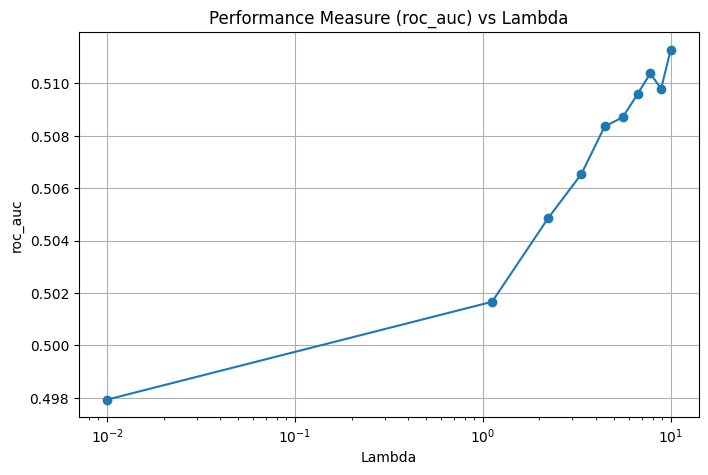

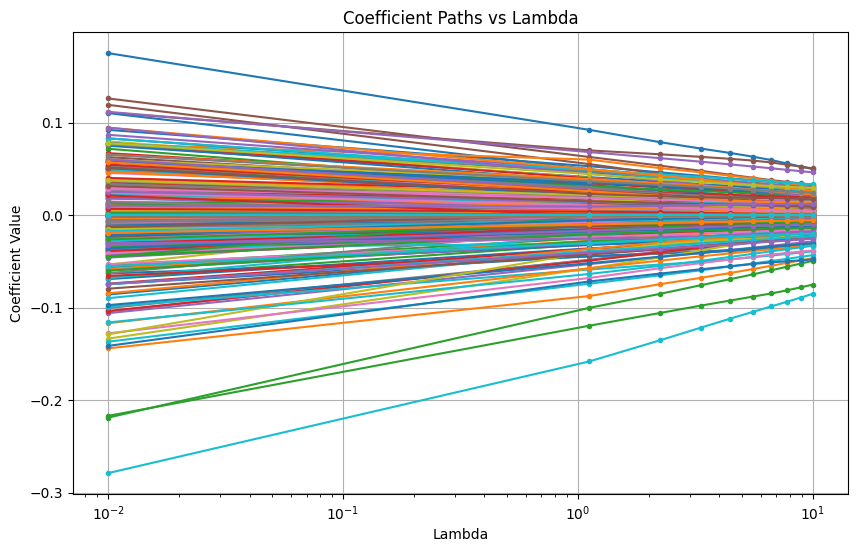

In [7]:
print(model.best_lambda_)
model.plot(dexter_valid, dexter_valid_y, measure="roc_auc")
model.plot_coefficients()

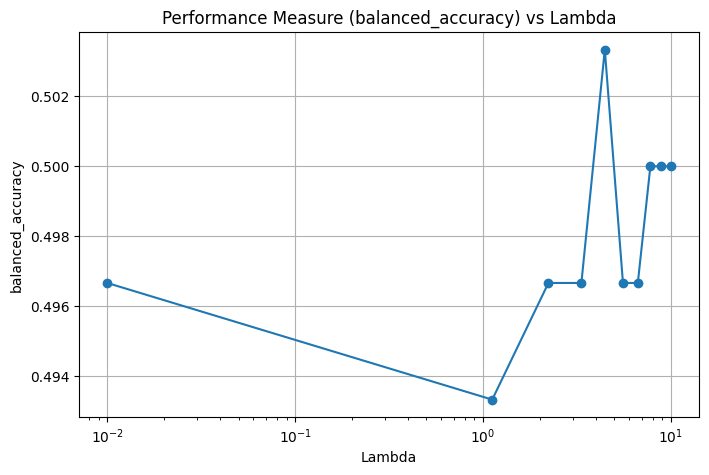

In [28]:
model.validate(dexter_valid, dexter_valid_y, measure="balanced_accuracy")
model.plot(dexter_valid, dexter_valid_y, measure="balanced_accuracy")

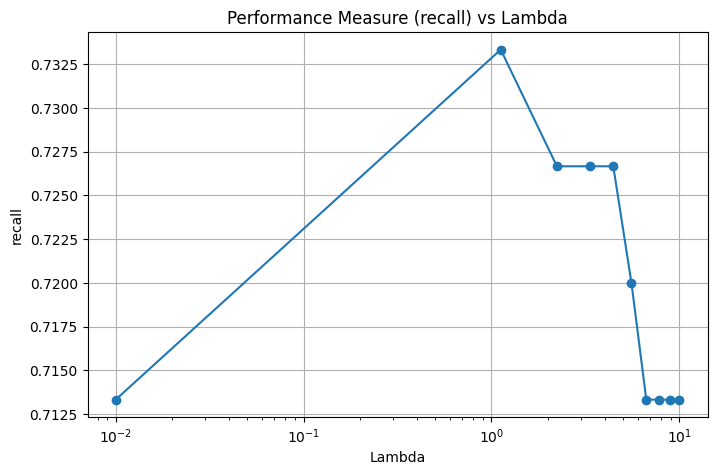

In [29]:
model.validate(dexter_valid, dexter_valid_y, measure="recall")
model.plot(dexter_valid, dexter_valid_y, measure="recall")


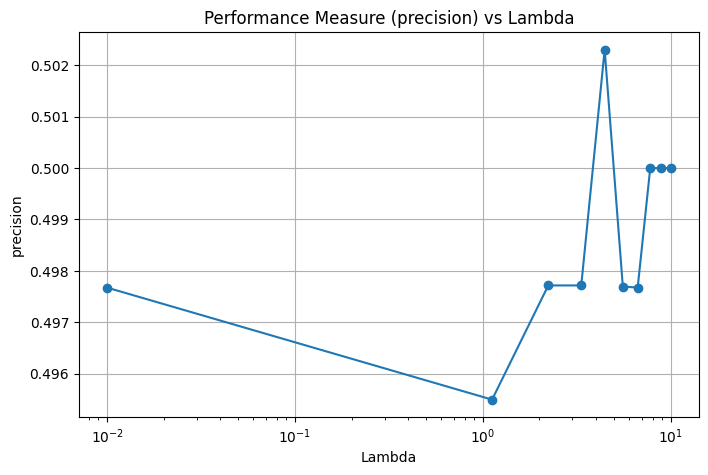

In [30]:
model.validate(dexter_valid, dexter_valid_y, measure="precision")
model.plot(dexter_valid, dexter_valid_y, measure="precision")

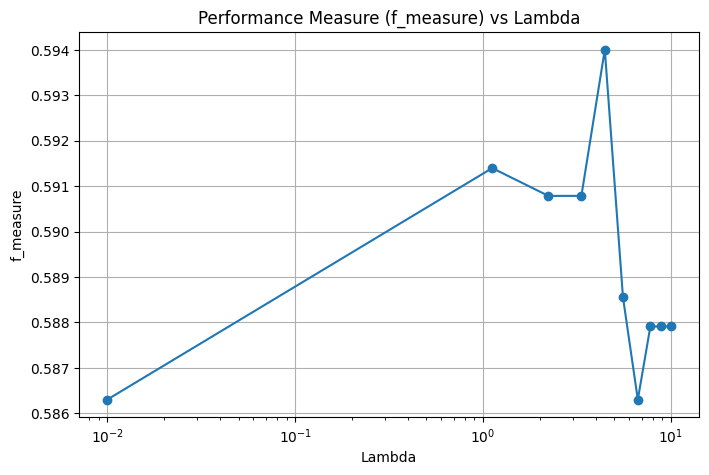

In [31]:
model.validate(dexter_valid, dexter_valid_y, measure="f_measure")
model.plot(dexter_valid, dexter_valid_y, measure="f_measure")

In [12]:
modelLR = LogisticRegression(penalty=None)
modelLR.fit(dexter_train, dexter_train_y)

LogisticRegression(penalty=None)

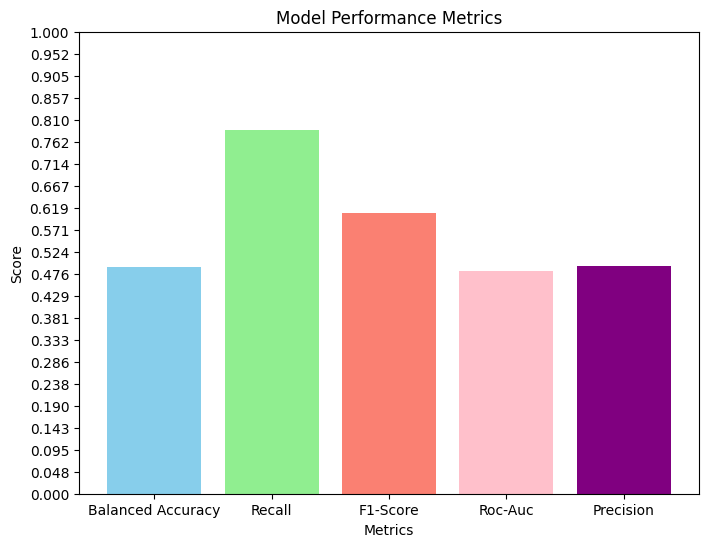

In [32]:
y_pred = modelLR.predict(dexter_valid)
y_prob = modelLR.predict_proba(dexter_valid)[:, 1] 

balanced_acc = balanced_accuracy_score(dexter_valid_y, y_pred)
recall = recall_score(dexter_valid_y, y_pred, average='binary')
f1 = f1_score(dexter_valid_y, y_pred, average='binary')
roc_auc = roc_auc_score(dexter_valid_y, y_prob)
precision = precision_score(dexter_valid_y, y_pred, average='binary')

metrics = ['Balanced Accuracy', 'Recall', 'F1-Score', 'Roc-Auc', 'Precision']
values = [balanced_acc, recall, f1, roc_auc, precision]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon', 'pink', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim([0, 1])  
plt.yticks(np.linspace(0, 1, 22))  

plt.show()

In [19]:
lambdas = [0]
model_l_0 = LogRegCCD(lambdas)
model_l_0.fit(dexter_train, dexter_train_y)
model_l_0.validate(dexter_valid, dexter_valid_y)

0
[0      9.972756e-01
67     1.017179e-58
100    1.000000e+00
101    9.937622e-01
105    1.000000e+00
           ...     
233    9.962769e-01
237    1.461144e-64
254    2.390860e-05
284    9.999999e-01
184    1.000000e+00
Length: 300, dtype: float64]
[[1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1
  0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1
  1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0
  0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
  1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
  1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1
  0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0
  0 0 1 1 1 1 1 1 0 0 1 1]]


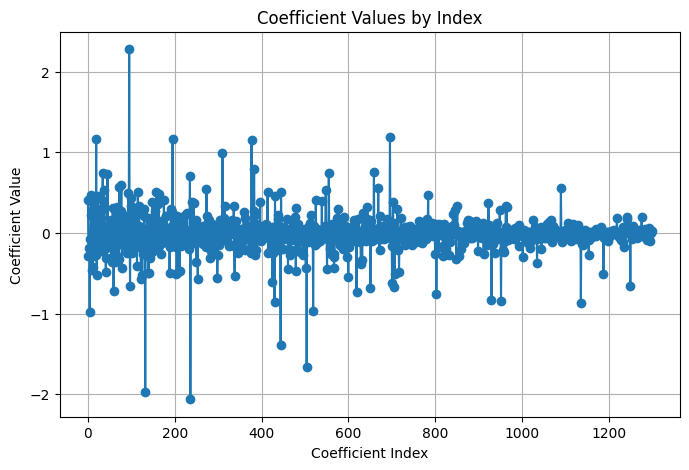

In [20]:
print(model_l_0.best_lambda_)
print(model_l_0.probas_)
print((np.array(model_l_0.probas_) >= 0.5).astype(int))


coefs = model_l_0.coef_path_[0]
indexes = np.arange(0, len(coefs))

plt.figure(figsize=(8, 5))
plt.plot(indexes, coefs, marker='o', linestyle='-')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Values by Index")
plt.grid(True)
plt.show()

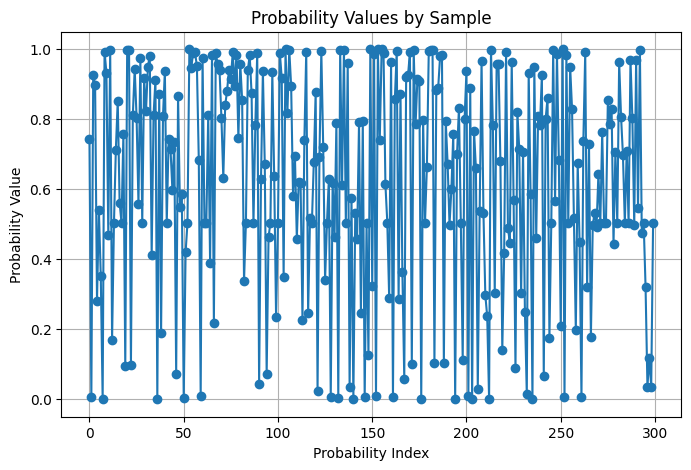

In [21]:
indexes = np.arange(0, len(model_l_0.probas_[0]))
plt.figure(figsize=(8, 5))
plt.plot(indexes, model.probas_[0], marker='o', linestyle='-')
plt.xlabel("Probability Index")
plt.ylabel("Probability Value")
plt.title("Probability Values by Sample")
plt.grid(True)
plt.show()


In [26]:
np.set_printoptions(threshold=np.inf, linewidth=200)

with open("logreg_ccd_coefs_dexter", "w") as f:
    print(model.best_coef_, file=f)  # Save captured output to file



In [27]:

with open("logreg_coefs_dexter", "w") as f:
    print(modelLR.coef_, file=f)  # Save captured output to file



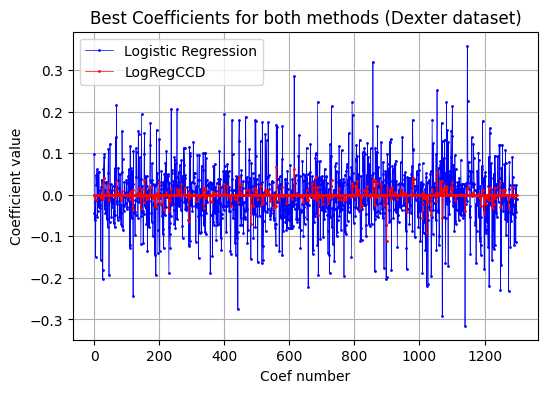

In [35]:
index_dexter = [i for i in range(len(model.best_coef_))]
plt.figure(figsize=(6, 4))
plt.plot(index_dexter, modelLR.coef_[0], marker='o', linestyle='-', label="Logistic Regression", color='blue', linewidth=0.5, markersize=1)
plt.plot(index_dexter, model.best_coef_, marker='o', linestyle='-', label="LogRegCCD", color='red', linewidth=0.5, markersize=1)
plt.xlabel('Coef number')
plt.ylabel("Coefficient value")
plt.title(f"Best Coefficients for both methods (Dexter dataset)")
plt.legend()
plt.grid(True)
plt.show()